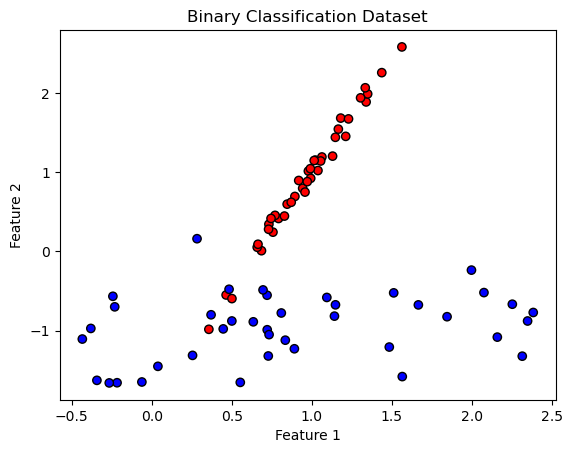

In [12]:
#1.
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=80, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [13]:
#2.
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

outliersclass1 = np.array([[6, 6], [7, 7]])  
outliersclass2 = np.array([[-6, -6], [-7, -7]]) 

X_train = np.vstack([X_train, outliersclass1, outliersclass2])
y_train = np.hstack([y_train, [0, 0, 1, 1]])

#The test set helps us to evaluate the model´s performance on the not descoverable data and we choose its size which is based on the total sample size, training of the balance and testing data needs

In [8]:
#3.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    print(f"{name}:\nTraining Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Confusion Matrix on Test Data:\n{conf_matrix}\n")


K-Nearest Neighbors:
Training Accuracy: 0.89, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]

Naive Bayes:
Training Accuracy: 0.77, Test Accuracy: 0.70
Confusion Matrix on Test Data:
[[7 3]
 [3 7]]

Decision Tree:
Training Accuracy: 1.00, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]

Random Forest:
Training Accuracy: 1.00, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]



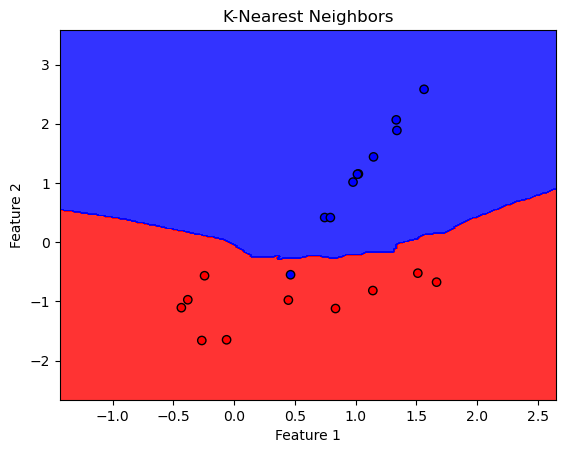

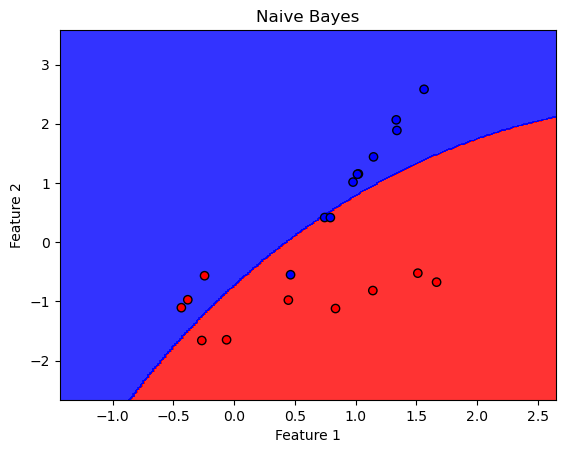

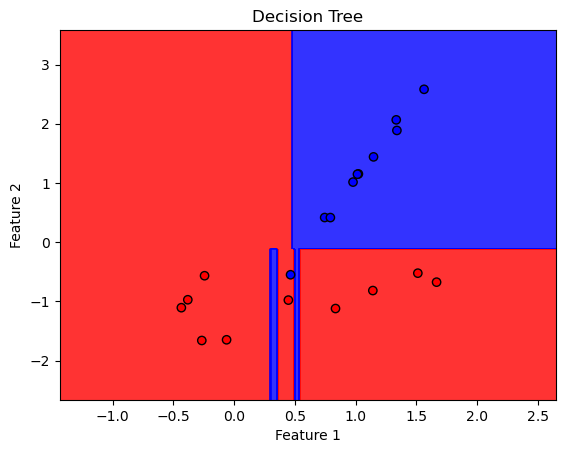

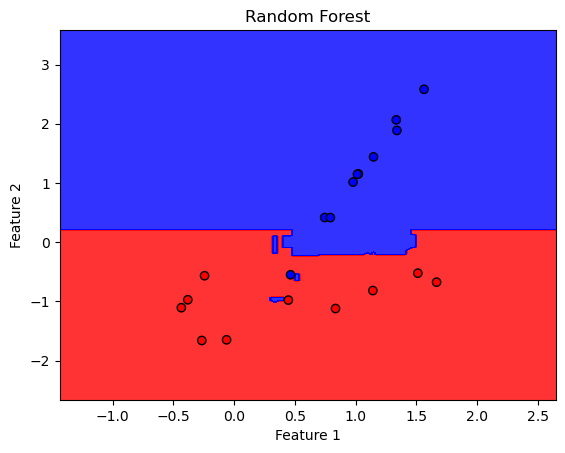

In [9]:
#4.
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, name)


In [ ]:
#5.
# Random Forests performed the best. An alternative classification problem would be if the dataset was more linear and less complex then a naive bayses classifier would perform better.